In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

set_seed(455)
np.random.seed(455)


In [2]:
dataset = pd.read_csv(
    r'C:\Users\ravi\Desktop\ML Algorithms\Datasets\archive\Mastercard_stock_history.csv', index_col="Date", parse_dates=["Date"]
).drop(["Dividends", "Stock Splits"], axis=1)

print(dataset.head())

                Open      High       Low     Close     Volume
Date                                                         
2006-05-25  3.748967  4.283869  3.739664  4.279217  395343000
2006-05-26  4.307126  4.348058  4.103398  4.179680  103044000
2006-05-30  4.183400  4.184330  3.986184  4.093164   49898000
2006-05-31  4.125723  4.219679  4.125723  4.180608   30002000
2006-06-01  4.179678  4.474572  4.176887  4.419686   62344000


In [3]:
print(dataset.describe())

              Open         High          Low        Close        Volume
count  3872.000000  3872.000000  3872.000000  3872.000000  3.872000e+03
mean    104.896814   105.956054   103.769349   104.882714  1.232250e+07
std     106.245511   107.303589   105.050064   106.168693  1.759665e+07
min       3.748967     4.102467     3.739664     4.083861  6.411000e+05
25%      22.347203    22.637997    22.034458    22.300391  3.529475e+06
50%      70.810079    71.375896    70.224002    70.856083  5.891750e+06
75%     147.688448   148.645373   146.822013   147.688438  1.319775e+07
max     392.653890   400.521479   389.747812   394.685730  3.953430e+08


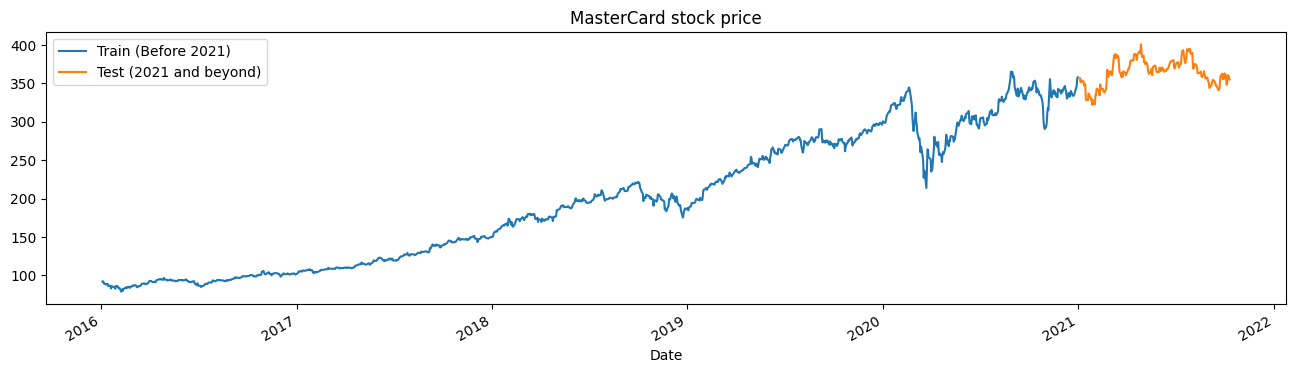

In [4]:
tstart = 2016
tend = 2020

def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("MasterCard stock price")
    plt.show()

train_test_plot(dataset,tstart,tend)


In [5]:
def train_test_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}", "High"].values
    test = dataset.loc[f"{tend+1}":, "High"].values
    return train, testa
training_set, test_set = train_test_split(dataset, tstart, tend)


In [6]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)


In [7]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


n_steps = 60
features = 1
# split into samples
X_train, y_train = split_sequence(training_set_scaled, n_steps)


In [8]:
# Reshaping X_train for model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)


In [9]:
# The LSTM architecture
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model_lstm.add(Dense(units=1))
# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse")

model_lstm.summary()


c:\Users\ravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 125)            │        63,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,626 (248.54 KB)

 Trainable params: 63,626 (248.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model_lstm.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0251
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0029
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0017
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0011
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0011
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 9.5743e-04
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 8.3739e-04
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 7.6704e-04
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 7.0902e-04
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 6.4221e-04
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 7.1791e-04
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 6.2227e-04
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 6.2473e-04
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 5.7740e-04
Epoch 15/50
38/38 ━━━━━━━━━━━━━━━━━

In [11]:
dataset_total = dataset.loc[:,"High"]
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1, 1)
#scaling
inputs = sc.transform(inputs)

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
#prediction
predicted_stock_price = model_lstm.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [12]:
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("MasterCard Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("MasterCard Stock Price")
    plt.legend()
    plt.show()


def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))


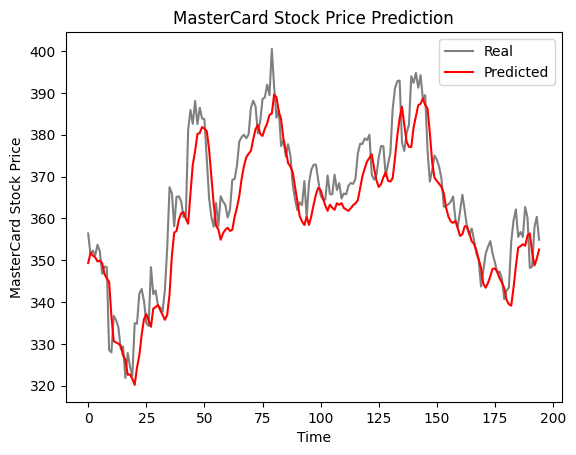

The root mean squared error is 7.53.


In [13]:
plot_predictions(test_set,predicted_stock_price)
return_rmse(test_set,predicted_stock_price)

In [17]:
model_gru = Sequential()
model_gru.add(GRU(units=125, activation="tanh", input_shape=(n_steps, features)))
model_gru.add(Dense(units=1))
# Compiling the RNN
model_gru.compile(optimizer="RMSprop", loss="mse")

model_gru.summary()

c:\Users\ravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 125)            │        48,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,126 (187.99 KB)

 Trainable params: 48,126 (187.99 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model_gru.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0484
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0024
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0010
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 8.6214e-04
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 7.4146e-04
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 7.3243e-04
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 6.3979e-04
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 6.1740e-04
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 5.6847e-04
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 5.4557e-04
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 5.1696e-04
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 4.9672e-04
Epoch 13/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 4.7790e-04
Epoch 14/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 4.6208e-04
Epoch 15/50
38/38 ━━━━━━━━━

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step


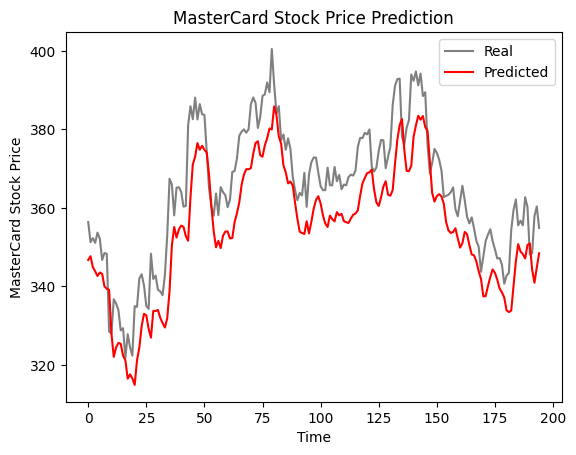

In [19]:
GRU_predicted_stock_price = model_gru.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
plot_predictions(test_set, GRU_predicted_stock_price)


In [20]:
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 11.14.


                Open      High       Low     Close     Volume
Date                                                         
2006-05-25  3.748967  4.283869  3.739664  4.279217  395343000
2006-05-26  4.307126  4.348058  4.103398  4.179680  103044000
2006-05-30  4.183400  4.184330  3.986184  4.093164   49898000
2006-05-31  4.125723  4.219679  4.125723  4.180608   30002000
2006-06-01  4.179678  4.474572  4.176887  4.419686   62344000
              Open         High          Low        Close        Volume
count  3872.000000  3872.000000  3872.000000  3872.000000  3.872000e+03
mean    104.896814   105.956054   103.769349   104.882714  1.232250e+07
std     106.245511   107.303589   105.050064   106.168693  1.759665e+07
min       3.748967     4.102467     3.739664     4.083861  6.411000e+05
25%      22.347203    22.637997    22.034458    22.300391  3.529475e+06
50%      70.810079    71.375896    70.224002    70.856083  5.891750e+06
75%     147.688448   148.645373   146.822013   147.688438  1.3

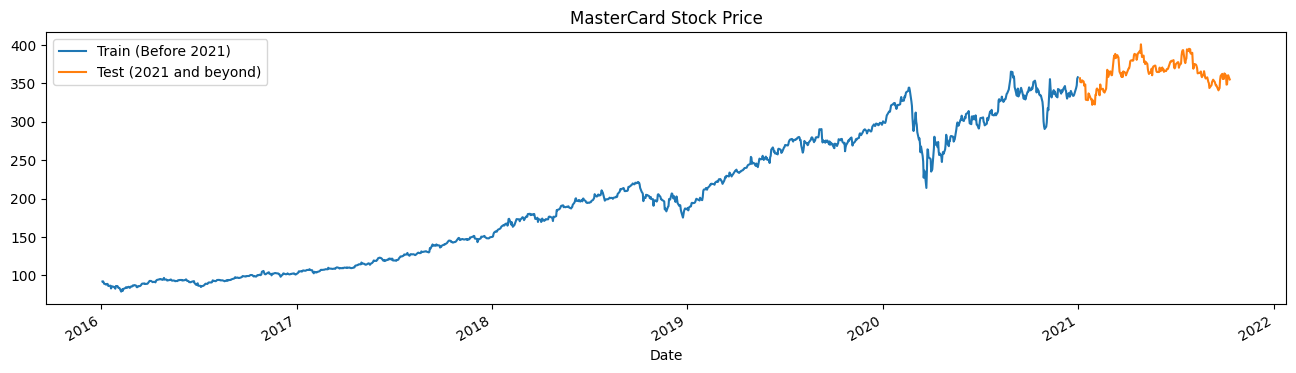

c:\Users\ravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 125)            │        63,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,626 (248.54 KB)

 Trainable params: 63,626 (248.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.0000e+00 - loss: 0.0204 - val_accuracy: 0.0042 - val_loss: 0.0110
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.0000e+00 - loss: 0.0013 - val_accuracy: 0.0042 - val_loss: 0.0137
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.0000e+00 - loss: 0.0014 - val_accuracy: 0.0042 - val_loss: 0.0085
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.0000e+00 - loss: 0.0012 - val_accuracy: 0.0042 - val_loss: 0.0080
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.0000e+00 - loss: 9.3285e-04 - val_accuracy: 0.0042 - val_loss: 0.0061
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.0000e+00 - loss: 8.0620e-04 - val_accuracy: 0.0042 - val_loss: 0.0057
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.0000e+00 - loss: 6.8960e-04 - val_accuracy: 0.0042 - val_loss: 0.0048
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.0000e+

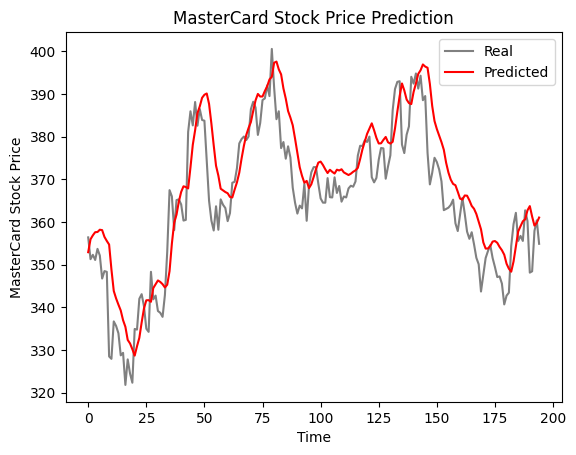

The root mean squared error is 8.51.


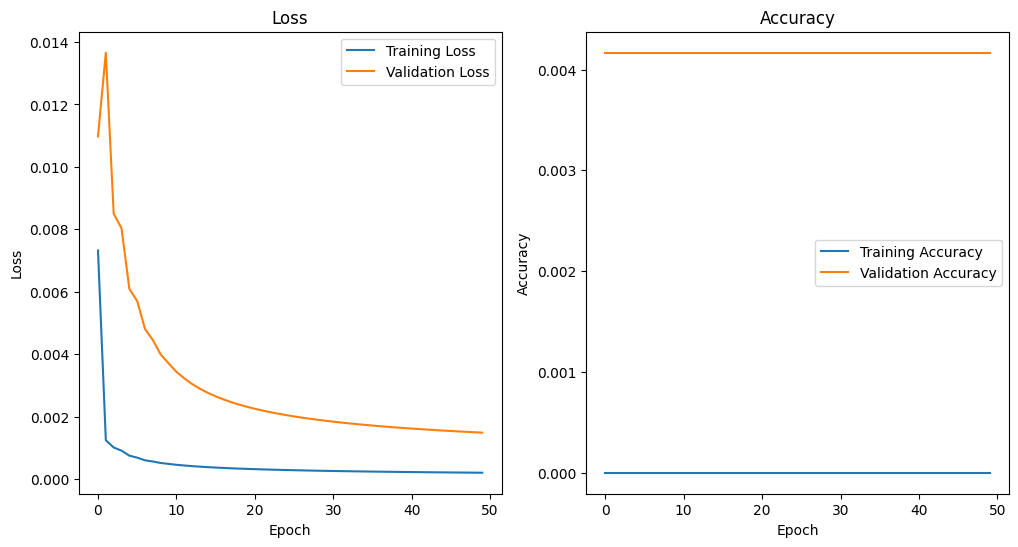

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import RMSprop
from tensorflow.random import set_seed

# Set seed for reproducibility
set_seed(455)
np.random.seed(455)

# Load dataset
dataset = pd.read_csv(
    r'C:\Users\ravi\Desktop\ML Algorithms\Datasets\archive\Mastercard_stock_history.csv',
    index_col="Date", parse_dates=["Date"]
).drop(["Dividends", "Stock Splits"], axis=1)

# Print dataset details
print(dataset.head())
print(dataset.describe())

# Define time range for training and testing
tstart = 2016
tend = 2020

# Function to plot training and test data
def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("MasterCard Stock Price")
    plt.show()

train_test_plot(dataset, tstart, tend)

# Function to split data into train and test
def train_test_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}", "High"].values
    test = dataset.loc[f"{tend+1}":, "High"].values
    return train, test

# Split data into train and test
training_set, test_set = train_test_split(dataset, tstart, tend)

# Scale data
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

# Function to split data into sequences
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Define parameters for the sequence
n_steps = 60
features = 1

# Split data into samples
X_train, y_train = split_sequence(training_set_scaled, n_steps)

# Reshape input data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], features)

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model_lstm.add(Dense(units=1))

# Compile the model with accuracy as a metric
model_lstm.compile(optimizer="RMSprop", loss="mse", metrics=['accuracy'])

# Summarize model structure
model_lstm.summary()

# Train the model with validation split
history = model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Prepare data for prediction
dataset_total = dataset.loc[:, "High"]
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

# Split inputs for testing
X_test, y_test = split_sequence(inputs, n_steps)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)

# Predict stock prices
predicted_stock_price = model_lstm.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Function to plot predictions
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("MasterCard Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("MasterCard Stock Price")
    plt.legend()
    plt.show()

# Function to calculate RMSE
def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

# Plot predictions and calculate RMSE
plot_predictions(test_set, predicted_stock_price)
return_rmse(test_set, predicted_stock_price)

# Plot training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
